In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
import wineClassification

# Import the Dataset

In [3]:
wineQuality = wineClassification.read_csv()
wineQuality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,False
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,False
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,False
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,True


# Exploratory Data Analysis and Data Pre-processing

In [4]:
wineClassification.is_null_values(wineQuality)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
recommend               0
dtype: int64

#### Eliminate the feature 'quality' from the dataset. This is because we are creating models to predict wine recommendations (binary classification), and recommend is a direct function of wine quality.

In [5]:
wineQuality = wineClassification.drop_quality_column(wineQuality, "quality")
wineQuality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,False
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,False
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,False
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,True


### Feature Matrix

#### Extract Wine Recommendation Features from the dataset into separate dataframe

In [6]:
recommend_features = wineClassification.extract_features(wineQuality)
feature_column_names = recommend_features.columns
recommend_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


### Target Variable

#### Exploration of Recommend as our target variable, making this a binary classification problem, with two class labels, True or False for wine recommendations.

In [7]:
recommend_labels = wineQuality.iloc[:,-1]
recommend_labels

0       False
1       False
2       False
3       False
4       False
        ...  
4893    False
4894    False
4895    False
4896     True
4897    False
Name: recommend, Length: 4898, dtype: bool

### Imbalanced Classification

#### We have an imbalanced class distribution of our target variable, with 78 percent for the majority class(False), and 22 percent for the minority class(True). Here, we would like to investigate wines that are recommended, so the minority class is important to explore.

In [8]:
wineClassification.class_distribution(recommend_labels)

Class Label=False, Class Count=3838, Distribution=78.36%
Class Label=True, Class Count=1060, Distribution=21.64%


### Encode Target Labels with 0(False) and 1(True)

#### Use Label Encoder to transform the non-numerical class labels to numeric values.

In [9]:
recommend_labels = wineClassification.label_encoding(recommend_labels)
recommend_labels

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Univariate Plots: Data Distribution Across Wine Quality features

#### Features generally have a Gaussian distribution, with most features seeming to skew towards the left, such as free sulfur dioixde, chlorides, residual sugar, and density. pH is more normally distributed between 2.8 and 3.6.

## Bivariate Plotting: Explore Relationships Among Features

### Correlation Matrix of Wine Quality Features

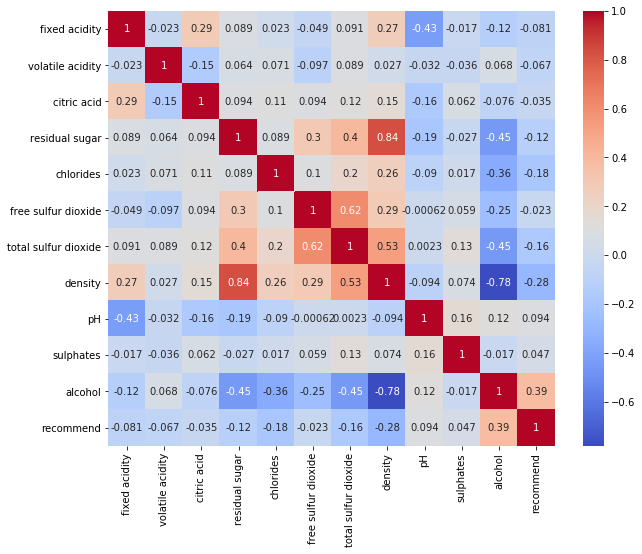

In [10]:
wineClassification.feature_correlations(wineQuality)

#### There appears to be moderate positive correlations between total sulfur dioxide and free sulfur dioxide, and density and total sulfur dioxide. There is also a strong negative correlation between density and alcohol.

### Density & Residual Sugar

#### The greater the sugar content, the more dense the liquid

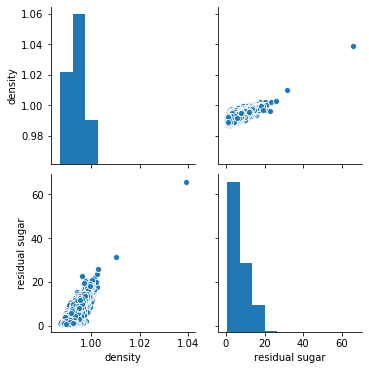

In [11]:
wineClassification.bivar_plot(wineQuality, 'density', 'residual sugar')

### Density & Alcohol

#### Less alcohol content there is, the greater density the liquid has.

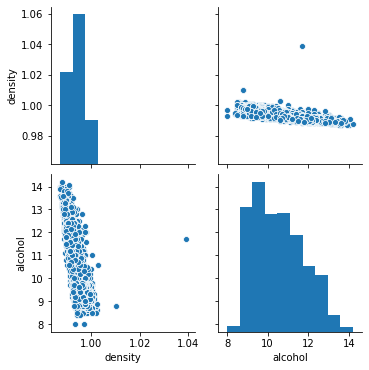

In [12]:
wineClassification.bivar_plot(wineQuality, 'density', 'alcohol')

### Total Sulfur Dioxide & Free Sulfur Dioxide

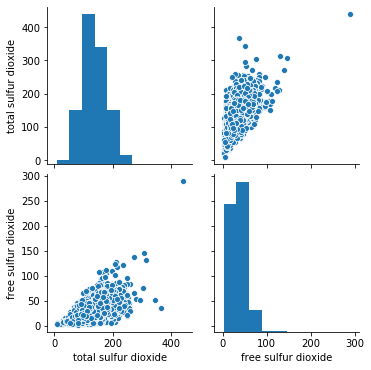

In [13]:
wineClassification.bivar_plot(wineQuality, 'total sulfur dioxide', 'free sulfur dioxide')

## Feature Scaling

#### Normalize the range of the wine features in the dataset, so that all features have same weights. In algorithms like kNN that rely on Euclidiean Distance, independent variables with larger scales would overpower the features smaller in scale, giving inaccurate results. The data appears to generally have a Gaussian distribution around each feature, so Standard Scaler is used

In [14]:
recommend_features = wineClassification.feature_scaling(recommend_features, feature_column_names)
recommend_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


# Generate Models

### kNN and Decision Tree

In [15]:
ml_models = []
wineClassification.create_ml_models(ml_models)
ml_models

[('k Nearest Neighbors',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best'))]

# Resampling Methods to Evaluate Model Performance

### Wine Recommendation Evaluation Metrics

#### In the case of wine recommendations, we would want to limit the amount of false positives we have. It would be more costly to recommend a wine to a customer that turned out to be poor and disliked, rather than giving a poor wine review, only to have the wine to turn out to be greatly enjoyed. Since making a false positive classification is high, precision is a good metric because it measures how well a model predicts the positive class (in our case, great wine!). We can also look at F-measure as well, allowing precision and recall to be combined into one score. Specifically, I am using the Fbeta-measure, using a coefficient beta value of 0.5 because I want to scale more towards precision.

## Traversal of Train Test Splits

### With train test splitting, we take the original dataset and split it into two parts. The training set is used to train the machine learning model, and the model then makes predictions on the test set, and we examine the predictions the model made against the outcome we expected. Common splits on training and test data are 67 train to 33 test, 80 train to 20 test, 75 test to 25 test, and 70 train to 30 test.

### The function evaluate_models_trainTestSplit is a function that takes as parameters the feature matrix of the dataset, the target labels, and a list of models to investigate. It returns a dataframe containing a range of train test splits and the accuracy scores for each model for each split. For both models, the best train test split was 75 percent train, 25 percent test. As a greater proportion of the dataset was allocated to the test set, accuracy scores for both models decreased.

### The function evaluate_models_trainTestSplit is a function that takes as parameters the feature matrix of the dataset, the target labels, and a list of models to investigate. It returns a dataframe containing a range of train test splits and the accuracy scores for each model for each split. For both models, the best train test split was 75 percent train, 25 percent test. As a greater proportion of the dataset was allocated to the test set, accuracy scores for both models decreased.

In [16]:
wineClassification.evaluate_models_trainTestSplit(recommend_features, recommend_labels, ml_models)

,Model,Test Size,Train Size,Accuracy,Precision
0,k Nearest Neighbors,0.20,0.80,0.837755,0.691011
1,Decision Tree,0.20,0.80,0.819388,0.598425
2,k Nearest Neighbors,0.25,0.75,0.839184,0.688312
3,Decision Tree,0.25,0.75,0.819592,0.601942
4,k Nearest Neighbors,0.30,0.70,0.835374,0.658182
5,Decision Tree,0.30,0.70,0.831293,0.625387
6,k Nearest Neighbors,0.35,0.65,0.825656,0.635179
7,Decision Tree,0.35,0.65,0.827988,0.610687
8,k Nearest Neighbors,0.40,0.60,0.815816,0.602817
9,Decision Tree,0.40,0.60,0.815306,0.574074


## K Fold Cross Validation

### Repeated Stratified KFold Cross Validation

### When dealing with imbalanced datasets, it is important to ensure that the class distribution is maintained acrossall folds. if we were to use K Fold Cross Validation, we could not ensure that the class distribution would be preserved across every fold. In that case, the model may only be able to predict the majority class well, giving misleading results of how well our model is performing. Stratified K Fold ensures that we have the same porportion of both classes in every fold. Building on this, Repeated Stratified K Fold repeats the Stratified K Fold procedure n times. The dataset is randomly split into k folds over n number of iterations.Each iteration produces a different train/test split of the dataset

### The function cv_space_traversal takes in a classifier, the features of the dataset, the labels of the dataset, and the number of folds. it returns the average of the evaluation metrics accuracy, precision, and fbeta

### Accuracy, Precision, and fbeta scores gradually increase as you increase the number of folds

In [17]:
wineClassification.evaluate_ml_model_crossVal(recommend_features, recommend_labels, ml_models, 21)

,Model,Number of Folds,Accuracy,Precision,fbeta
0,k Nearest Neighbors,2,0.817783,0.596321,0.571631
1,Decision Tree,2,0.797264,0.545428,0.542266
2,k Nearest Neighbors,3,0.823705,0.609507,0.588264
3,Decision Tree,3,0.820236,0.576602,0.587081
4,k Nearest Neighbors,4,0.827585,0.621995,0.598068
5,Decision Tree,4,0.819927,0.584691,0.591869
6,k Nearest Neighbors,5,0.829319,0.625087,0.602555
7,Decision Tree,5,0.832685,0.602136,0.610352
8,k Nearest Neighbors,6,0.831875,0.634162,0.608909
9,Decision Tree,6,0.828398,0.606790,0.606375


# Hyperparameter Tuning Using Grid Search

### The default parameters were used in the classifiers above. However, we can improve model accuracy by tuning the hyperparameters. To do this, we create a grid of parameters to test on the model, and use GridSearchCV to determine the best performing model based on the set of parameters we put in the grid.

### Hyperparameter tuning with K-Nearest Neighbors

In [18]:
wineClassification.grid_search_knn(recommend_features, recommend_labels)

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                      weights='uniform'),
 0.81)

### Hyperparameter tuning with Decision Trees

In [19]:
wineClassification.grid_search_dt(recommend_features, recommend_labels)

(DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 0.7981)

### While accuracy scores did not differ greatly, kNN appears to have had a higher score on preciison for the minority class than Decision tree. 

In [20]:
wineClassification.knn_eval_model_predictions(recommend_features, recommend_labels)

Accuracy of kNN: 0.8195918367346938


Confusion Matrix for kNN
[[889  52]
 [169 115]]


Classification Report for kNN
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       941
           1       0.69      0.40      0.51       284

    accuracy                           0.82      1225
   macro avg       0.76      0.67      0.70      1225
weighted avg       0.81      0.82      0.80      1225



In [21]:
wineClassification.dc_eval_model_predictions(recommend_features, recommend_labels)

Accuracy of Decision Tree: 0.8081632653061225
Confusion Matrix for Decision Tree
[[837 104]
 [131 153]]
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       941
           1       0.60      0.54      0.57       284

    accuracy                           0.81      1225
   macro avg       0.73      0.71      0.72      1225
weighted avg       0.80      0.81      0.80      1225

